## A.)  Plot the mapping function for and . Also plot 100--200 iterates of a typical
initial point in function of time (number of iterations) for both parameter values. Do they
look like chaotic processes?

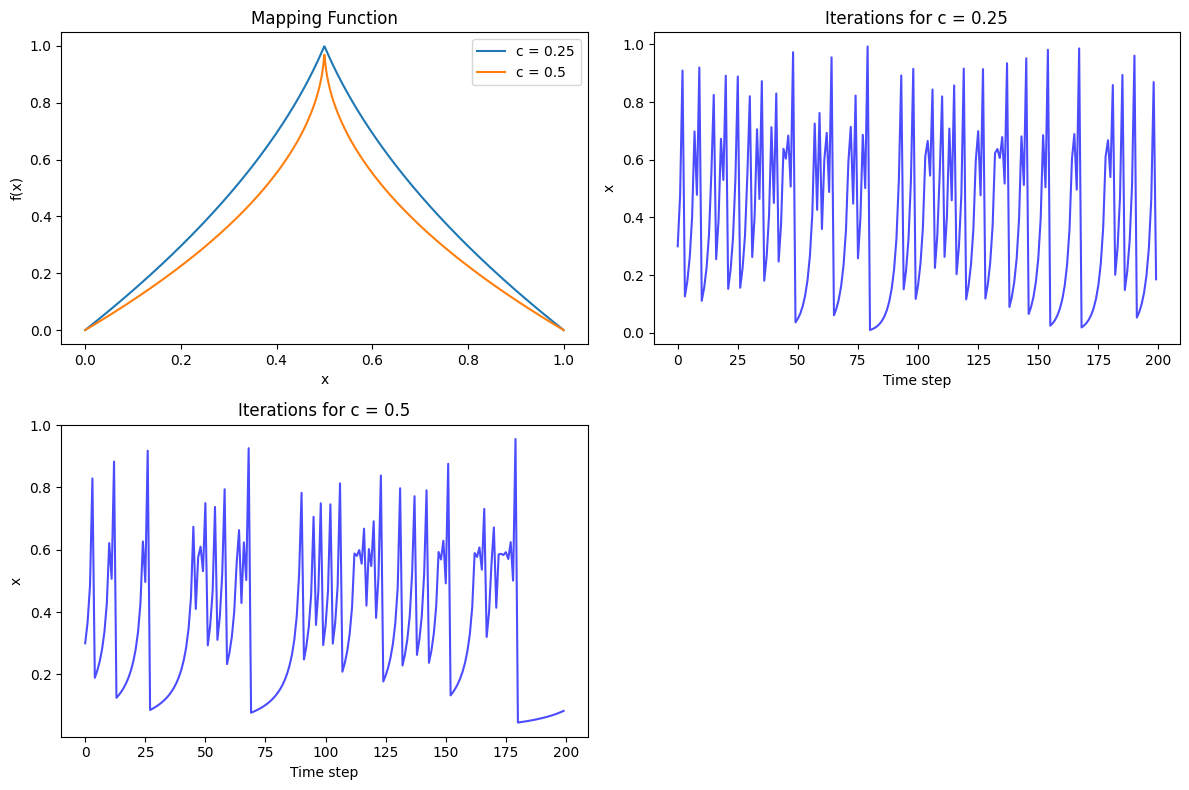

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, c):
    """Curved tent map function"""
    return (1 + 2*c - np.sqrt((1 - 2*c)**2 + 8*c*np.abs(1 - 2*x))) / (4*c)

def plot_mapping_and_iterations():
    c_values = [0.25, 0.5]
    x = np.linspace(0, 1, 1000)
    
    plt.figure(figsize=(12, 8))
    
    # Plot mapping functions
    plt.subplot(2, 2, 1)
    for c in c_values:
        plt.plot(x, f(x, c), label=f'c = {c}')
    plt.title('Mapping Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    
    # Plot iterations
    n_iter = 200
    x0 = 0.3
    
    for i, c in enumerate(c_values):
        plt.subplot(2, 2, 2+i)
        trajectory = [x0]
        for _ in range(n_iter-1):
            trajectory.append(f(trajectory[-1], c))
        
        plt.plot(range(n_iter), trajectory, 'b-', alpha=0.7)
        plt.title(f'Iterations for c = {c}')
        plt.xlabel('Time step')
        plt.ylabel('x')
    
    plt.tight_layout()
    plt.show()

plot_mapping_and_iterations()

## B.)

In [3]:
def verify_invariant_density(c):
    """Verify the invariant density analytically at specific points"""
    def p_star(x, c):
        return 1 + 2*c - 4*c*x
    
    # Choose test points
    test_points = [0.2, 0.5, 0.8]
    
    for x in test_points:
        # Left branch pre-image
        y_L = (c + 0.5)*x - c*x**2
        deriv_L = c + 0.5 - 2*c*y_L
        
        # Right branch pre-image
        y_R = 1 - (c + 0.5)*x + c*x**2
        deriv_R = -(c + 0.5) + 2*c*y_R
        
        # Perron-Frobenius condition
        pf_condition = p_star(y_L, c)/abs(deriv_L) + p_star(y_R, c)/abs(deriv_R)
        
        print(f"For x={x:.2f}, c={c:.2f}:")
        print(f"p*={p_star(x, c):.4f}, PF operator gives={pf_condition:.4f}")
        print(f"Difference: {abs(p_star(x, c) - pf_condition):.2e}\n")

verify_invariant_density(0.25)
verify_invariant_density(0.5)

For x=0.20, c=0.25:
p*=1.3000, PF operator gives=4.0000
Difference: 2.70e+00

For x=0.50, c=0.25:
p*=1.0000, PF operator gives=4.0000
Difference: 3.00e+00

For x=0.80, c=0.25:
p*=0.7000, PF operator gives=4.0000
Difference: 3.30e+00

For x=0.20, c=0.50:
p*=1.6000, PF operator gives=4.0000
Difference: 2.40e+00

For x=0.50, c=0.50:
p*=1.0000, PF operator gives=4.0000
Difference: 3.00e+00

For x=0.80, c=0.50:
p*=0.4000, PF operator gives=4.0000
Difference: 3.60e+00

